# Breadth Indicators

Breadth Indicators include:

On Balance Volume

McClellan Summation Index
Arms Index (TRIN)

Force Index

Chaikin Oscillator

Up/Down Volume Ratio

Up/Down Volume Spread

Cumulative Volume Index

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'SPY'
start = '2012-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,110.244629,193697900
2012-01-04,127.199997,127.809998,126.709999,127.699997,110.417557,127186500
2012-01-05,127.010002,128.229996,126.430000,128.039993,110.711548,173895000
2012-01-06,128.199997,128.220001,127.290001,127.709999,110.426208,148050000
2012-01-09,128.000000,128.179993,127.410004,128.020004,110.694260,99530200


In [3]:
df['Adj Close'][1:]

Date
2012-01-04    110.417557
2012-01-05    110.711548
2012-01-06    110.426208
2012-01-09    110.694260
2012-01-10    111.654045
2012-01-11    111.714554
2012-01-12    111.982590
2012-01-13    111.403275
2012-01-17    111.835632
2012-01-18    113.072098
2012-01-19    113.668709
2012-01-20    114.092407
2012-01-23    113.798370
2012-01-24    113.668709
2012-01-25    114.619827
2012-01-26    114.031883
2012-01-27    113.980011
2012-01-30    113.590881
2012-01-31    113.547661
2012-02-01    114.542015
2012-02-02    114.723579
2012-02-03    116.331863
2012-02-06    116.254051
2012-02-07    116.548042
2012-02-08    116.893898
2012-02-09    117.040901
2012-02-10    116.176231
2012-02-13    117.040901
2012-02-14    116.893898
2012-02-15    116.349159
                 ...    
2018-11-15    270.244537
2018-11-16    270.947357
2018-11-19    266.364441
2018-11-20    261.435028
2018-11-21    262.325867
2018-11-23    260.573883
2018-11-26    264.780670
2018-11-27    265.671539
2018-11-28    271.78

In [4]:
import talib as ta

## On Balance Volume

In [5]:
OBV = ta.OBV(df['Adj Close'], df['Volume'])

## McClellan Summation Index Arms Index (TRIN)

https://www.investopedia.com/terms/m/mcclellanoscillator.asp

In [6]:
import quandl as q

# For NASDAQ
#Advances = q.get('URC/NASDAQ_ADV')['Numbers of Stocks']
#Declines = q.get('URC/nASDAQ_DEC')['Numbers of Stocks']   
#n = Advances - Declines

In [7]:
Advances = q.get('URC/NYSE_ADV', start_date = "2017-07-27")['Numbers of Stocks']
Declines = q.get('URC/NYSE_DEC', start_date = "2017-07-27")['Numbers of Stocks']  

In [8]:
adv_vol = q.get("URC/NYSE_ADV_VOL", start_date = "2017-07-27")['Numbers of Stocks']
dec_vol = q.get("URC/NYSE_DEC_VOL", start_date = "2017-07-27")['Numbers of Stocks']

In [9]:
data = pd.DataFrame()
data['Advances'] = Advances
data['Declines'] = Declines
data['adv_vol'] = adv_vol
data['dec_vol'] = dec_vol

In [10]:
data['Net_Advances'] = data['Advances'] - data['Declines'] 
data['Ratio_Adjusted'] = (data['Net_Advances']/(data['Advances'] + data['Declines'])) * 1000
data['19_EMA'] = ta.EMA(data['Ratio_Adjusted'], timeperiod=19)
data['39_EMA'] = ta.EMA(data['Ratio_Adjusted'], timeperiod=39)
data['RANA'] = (data['Advances'] - data['Declines']) / (data['Advances'] + data['Declines']) * 1000

In [11]:
# Finding the TRIN Value
data['ad_ratio'] = data['Advances'].divide(data['Declines'] ) # AD Ratio
data['ad_vol'] = data['adv_vol'].divide(data['dec_vol']) # AD Volume Ratio
data['TRIN'] = data['ad_ratio'].divide(data['adv_vol']) # TRIN Value

In [12]:
data.head()

,Advances,Declines,adv_vol,dec_vol,Net_Advances,Ratio_Adjusted,19_EMA,39_EMA,RANA,ad_ratio,ad_vol,TRIN
Date,,,,,,,,,,,,
2017-07-27,1320.0,1610.0,1.795852e+09,2.081253e+09,-290.0,-98.976109,NaN,NaN,-98.976109,0.819876,0.862871,4.565387e-10
2017-07-28,1585.0,1347.0,1.392776e+09,1.757435e+09,238.0,81.173261,NaN,NaN,81.173261,1.176689,0.792505,8.448513e-10
2017-07-31,1583.0,1400.0,1.727800e+09,1.574906e+09,183.0,61.347637,NaN,NaN,61.347637,1.130714,1.097082,6.544241e-10
2017-08-01,1774.0,1169.0,1.777532e+09,1.535265e+09,605.0,205.572545,NaN,NaN,205.572545,1.517536,1.157801,8.537323e-10
2017-08-02,1172.0,1764.0,1.335177e+09,2.024331e+09,-592.0,-201.634877,NaN,NaN,-201.634877,0.664399,0.659564,4.976114e-10


## Force Index

In [13]:
def ForceIndex(data,n):
    ForceIndex=pd.Series(df['Adj Close'].diff(n)* df['Volume'],name='ForceIndex')
    data = data.join(ForceIndex)
    return data

In [14]:
n=10
ForceIndex = ForceIndex(data,n)
ForceIndex = ForceIndex['ForceIndex']

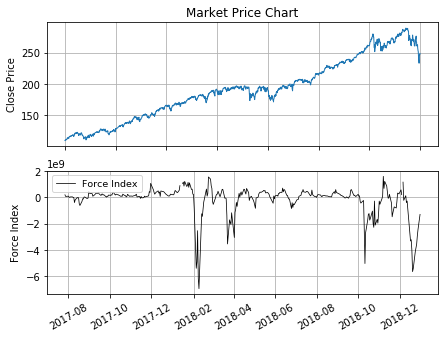

In [15]:
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(2,1,1)
ax.set_xticklabels([])
plt.plot(df['Adj Close'],lw=1)
plt.title('Market Price Chart')
plt.ylabel('Close Price')
plt.grid(True)
bx=fig.add_subplot(2,1,2)
plt.plot(ForceIndex,'k',lw=0.75,linestyle='-',label='Force Index')
plt.legend(loc=2,prop={'size':9.5})
plt.ylabel('Force Index')
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(),rotation=30)
plt.show()

## Chaikin Oscillator

In [16]:
def Chaikin(data):
    money_flow_volume = (2 * df['Adj Close'] - df['High'] - df['Low']) / (df['High'] - df['Low']) * df['Volume']  
    ad = money_flow_volume.cumsum()
    Chaikin = pd.Series(ad.ewm(com=(3-1)/2).mean() - ad.ewm(com=(10-1)/2).mean(), name='Chaikin')
    data = data.join(Chaikin)  
    return data

In [17]:
Chaikin(df)

,Open,High,Low,Close,Adj Close,Volume,Chaikin
Date,,,,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000,110.244629,193697900,0.000000e+00
2012-01-04,127.199997,127.809998,126.709999,127.699997,110.417557,127186500,-4.543919e+08
2012-01-05,127.010002,128.229996,126.430000,128.039993,110.711548,173895000,-1.035752e+09
2012-01-06,128.199997,128.220001,127.290001,127.709999,110.426208,148050000,-2.213366e+09
2012-01-09,128.000000,128.179993,127.410004,128.020004,110.694260,99530200,-3.386944e+09
2012-01-10,129.389999,129.649994,128.949997,129.130005,111.654045,115282000,-4.898310e+09
2012-01-11,128.729996,129.369995,128.520004,129.199997,111.714554,111540700,-6.153837e+09
2012-01-12,129.570007,129.699997,128.539993,129.509995,111.982590,118983700,-6.979759e+09
2012-01-13,128.639999,129.050003,127.720001,128.839996,111.403275,179836200,-7.907538e+09


## Up/Down Volume Ratio

Volume Spread = Up Volume - Down Volume 

In [18]:
Up = q.get('URC/NYSE_ADV', start_date = "2017-07-27")['Numbers of Stocks']
Down = q.get('URC/NYSE_DEC', start_date = "2017-07-27")['Numbers of Stocks']
Volume_Spread = Up - Down

In [19]:
Volume_Spread

Date
2017-07-27    -290.0
2017-07-28     238.0
2017-07-31     183.0
2017-08-01     605.0
2017-08-02    -592.0
2017-08-03    -429.0
2017-08-04     385.0
2017-08-07    -121.0
2017-08-08    -787.0
2017-08-09   -1156.0
2017-08-10   -2218.0
2017-08-11     204.0
2017-08-14    1576.0
2017-08-15    -808.0
2017-08-16     616.0
2017-08-17   -1884.0
2017-08-18     199.0
2017-08-21      46.0
2017-08-22    1277.0
2017-08-23     170.0
2017-08-24      46.0
2017-08-25    1023.0
2017-08-28    -200.0
2017-08-29     -53.0
2017-08-30     707.0
2017-08-31    1394.0
2017-09-01    1164.0
2017-09-05   -1178.0
2017-09-06     710.0
2017-09-07      71.0
               ...  
2019-02-07   -1102.0
2019-02-08    -109.0
2019-02-11     917.0
2019-02-12    1484.0
2019-02-13     872.0
2019-02-14     221.0
2019-02-15    1637.0
2019-02-19     811.0
2019-02-20     622.0
2019-02-21    -649.0
2019-02-22    1338.0
2019-02-25     -34.0
2019-02-26    -511.0
2019-02-27     145.0
2019-02-28    -251.0
2019-03-01     851.0
2019-03-

## Up/Down Volume Spread

Volume Ratio = Up Volume / Down Volume

In [20]:
Up = q.get('URC/NYSE_ADV', start_date = "2017-07-27")['Numbers of Stocks']
Down = q.get('URC/NYSE_DEC', start_date = "2017-07-27")['Numbers of Stocks']
Volume_Ratio = Up/Down

In [21]:
Volume_Ratio

Date
2017-07-27    0.819876
2017-07-28    1.176689
2017-07-31    1.130714
2017-08-01    1.517536
2017-08-02    0.664399
2017-08-03    0.746304
2017-08-04    1.297527
2017-08-07    0.921224
2017-08-08    0.578694
2017-08-09    0.439651
2017-08-10    0.155048
2017-08-11    1.147292
2017-08-14    3.194986
2017-08-15    0.572713
2017-08-16    1.521151
2017-08-17    0.227869
2017-08-18    1.147298
2017-08-21    1.031944
2017-08-22    2.513033
2017-08-23    1.122744
2017-08-24    1.032123
2017-08-25    2.068966
2017-08-28    0.873498
2017-08-29    0.964453
2017-08-30    1.628444
2017-08-31    2.798710
2017-09-01    2.309336
2017-09-05    0.432015
2017-09-06    1.637343
2017-09-07    1.049512
                ...   
2019-02-07    0.455534
2019-02-08    0.928431
2019-02-11    1.901672
2019-02-12    3.021798
2019-02-13    1.842512
2019-02-14    1.162979
2019-02-15    3.495427
2019-02-19    1.759363
2019-02-20    1.535284
2019-02-21    0.636415
2019-02-22    2.657993
2019-02-25    0.977135
2019-0

## Cumulative Volume Index

https://www.marketinout.com/technical_analysis.php?t=Cumulative_Volume_Index_(CVI)&id=38

In [22]:
# CVI = Yesterday's CVI + (Advancing Volume - Declining Volume)
data['CVI'] = data['Net_Advances'][1:] + (data['Advances'] - data['Declines']) 

In [23]:
data.head()

,Advances,Declines,adv_vol,dec_vol,Net_Advances,Ratio_Adjusted,19_EMA,39_EMA,RANA,ad_ratio,ad_vol,TRIN,CVI
Date,,,,,,,,,,,,,
2017-07-27,1320.0,1610.0,1.795852e+09,2.081253e+09,-290.0,-98.976109,NaN,NaN,-98.976109,0.819876,0.862871,4.565387e-10,NaN
2017-07-28,1585.0,1347.0,1.392776e+09,1.757435e+09,238.0,81.173261,NaN,NaN,81.173261,1.176689,0.792505,8.448513e-10,476.0
2017-07-31,1583.0,1400.0,1.727800e+09,1.574906e+09,183.0,61.347637,NaN,NaN,61.347637,1.130714,1.097082,6.544241e-10,366.0
2017-08-01,1774.0,1169.0,1.777532e+09,1.535265e+09,605.0,205.572545,NaN,NaN,205.572545,1.517536,1.157801,8.537323e-10,1210.0
2017-08-02,1172.0,1764.0,1.335177e+09,2.024331e+09,-592.0,-201.634877,NaN,NaN,-201.634877,0.664399,0.659564,4.976114e-10,-1184.0
